# # NLP-lecture2-works-Liang Shaoduan

# Part1 课堂代码复现

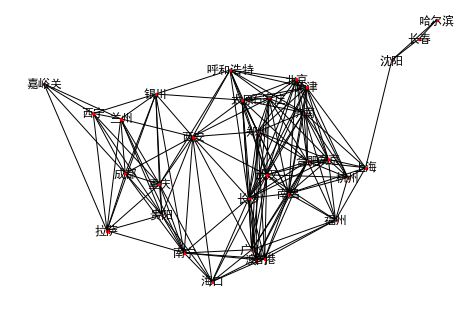

In [2]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from pylab import *

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""


def get_city_information(city_inform_source):
    
    city_location_inform = {}
    
    for line in city_inform_source.split('\n'):
        if line.startswith('//'):   continue
        if line.strip()=='':    continue
            
        city_name = re.findall("name:'(\w+)'", line)[0]
        city_coordi = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
        city_coordi = tuple(map(float, city_coordi))
        city_location_inform[city_name] = city_coordi
        
    return city_location_inform

city_inform = get_city_information(coordination_source)
#print(city_inform)

def city_geo_distance(city1, city2):
    lat1, lon1 = city_inform[city1]
    lat2, lon2 = city_inform[city2]
    radius = 6371  ##地球平均半径
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

Threshold = 700
    
def build_city_connection(city_inform):
    cities_connections = defaultdict(list)
    cities = list(city_inform.keys())
    
    for city1 in cities:
        for city2 in cities:
            if city1==city2:  continue
                
            if city_geo_distance(city1, city2) <= Threshold:
                cities_connections[city1].append(city2)
                
    return cities_connections

city_connections_net = build_city_connection(city_inform)
#print(city_connections_net)
cities_connections_graph = nx.Graph(city_connections_net)
nx.draw(cities_connections_graph, city_inform, with_labels=True, node_size=6)


def BF_Search1(Connection_Graph, start, destination):
    search_pathes = [[start]]
    visited_nodes = set()
    while search_pathes:
        path = search_pathes.pop(0)
        frontier_node = path[-1]
        if frontier_node in visited_nodes: continue    
        successor_nodes = Connection_Graph[frontier_node]
        for city in successor_nodes:
            if city in path: continue
            path = path + [city]
            search_pathes.append(path)
            
            if city == destination:
                return path
        visited_nodes.add(frontier_node)
        
#BF_Search1(city_connections_net, '成都', '海口')

def get_path_distance(path):
    path_distance_1 = 0
    for i in range(len(path)-1):
        between_nodes_distance = city_geo_distance(path[i], path[i+1])
        path_distance_1 += between_nodes_distance
    return path_distance_1

get_path_distance(BF_Search1(city_connections_net, '成都', '海口'))

def path_distance_sort(pathes):
    return sorted(pathes, key=get_path_distance)

#path_distance_sort([['成都','北京','哈尔滨'], ['嘉峪关', '兰州', '太原'], ['上海', '福州', '海口']])


def BF_Search2(Connection_Graph, start, destination, search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        successor = Connection_Graph[frontier]
        for city in successor:
            if city in path: continue
            path = path+[city]
            pathes.append(path)
            pathes = search_strategy(pathes)
            
            if pathes and pathes[0][-1] == destination:
                return pathes[0]

print(BF_Search1(city_connections_net, '北京', '上海'))
print(BF_Search2(city_connections_net, '北京', '上海', path_distance_sort))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


Iteration 0, the loss is 19200.97693260502, parameters k is -16.12016225582957 and b is -13.431105850399945
Iteration 1, the loss is 12769.266620019385, parameters k is -12.619606232864484 and b is -9.93054982743486
Iteration 2, the loss is 8498.69089827052, parameters k is -9.766988553241251 and b is -7.077932147811627
Iteration 3, the loss is 5663.160528441133, parameters k is -7.442378527658411 and b is -4.753322122228786
Iteration 4, the loss is 3780.5202012827817, parameters k is -5.548044138006176 and b is -2.8589877325765514
Iteration 5, the loss is 2530.600205851536, parameters k is -4.004343155765344 and b is -1.3152867503357197
Iteration 6, the loss is 1700.7977129049868, parameters k is -2.7463747972809793 and b is -0.05731839185135468
Iteration 7, the loss is 1149.9395029457564, parameters k is -1.721251143702214 and b is 0.9678052617274107
Iteration 8, the loss is 784.2847387208545, parameters k is -0.8858736097292584 and b is 1.803182795700366
Iteration 9, the loss is 541

Iteration 119, the loss is 63.4633716045854, parameters k is 2.791965102449688 and b is 5.481021507879314
Iteration 120, the loss is 63.463371604676844, parameters k is 2.7919651025421186 and b is 5.481021507971744
Iteration 121, the loss is 63.46337160475138, parameters k is 2.7919651026174406 and b is 5.481021508047066
Iteration 122, the loss is 63.4633716048121, parameters k is 2.791965102678821 and b is 5.481021508108446
Iteration 123, the loss is 63.46337160486164, parameters k is 2.79196510272884 and b is 5.481021508158465
Iteration 124, the loss is 63.463371604901916, parameters k is 2.7919651027696006 and b is 5.481021508199225
Iteration 125, the loss is 63.463371604934835, parameters k is 2.7919651028028167 and b is 5.481021508232441
Iteration 126, the loss is 63.46337160496154, parameters k is 2.7919651028298844 and b is 5.481021508259509
Iteration 127, the loss is 63.46337160498336, parameters k is 2.7919651028519423 and b is 5.481021508281567
Iteration 128, the loss is 63.4

Iteration 202, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 203, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 204, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 205, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 206, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 207, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 208, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 209, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 210, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 211, the loss is 63.4633716

Iteration 313, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 314, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 315, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 316, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 317, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 318, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 319, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 320, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 321, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 322, the loss is 63.4633716

Iteration 403, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 404, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 405, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 406, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 407, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 408, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 409, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 410, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 411, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 412, the loss is 63.4633716

Iteration 498, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681
Iteration 499, the loss is 63.4633716050795, parameters k is 2.7919651029490518 and b is 5.481021508378681


(2.7919651029490518, 5.481021508378681)

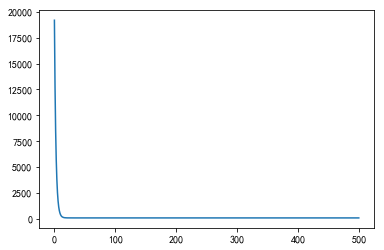

In [11]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
import math
import numpy as np

dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

def target_func(x, k, b):
    return (k*x+b)


def loss_func(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
                                                                                                                                                                        
def partial_derivative_k(x, y, y_hat):
    gradient = 0
    n = len(list(y_hat))
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient
                                                                                    

def partial_derivative_b(x, y, y_hat):                                                                                 
    gradient = 0
    n = len(list(y_hat))
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2/n * gradient

def linear_regression(data_x, data_y, learning_rate, iteration_num):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    losses=[]
    for i in range(iteration_num):
        price_use_current_y_hat = [target_func(x_i, k, b) for x_i in data_x]
        current_loss = loss_func(data_y, price_use_current_y_hat)
        losses.append(current_loss)
        
        print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
        
        k_gradient = partial_derivative_k(data_x, data_y, price_use_current_y_hat)
        b_gradient = partial_derivative_b(data_x, data_y, price_use_current_y_hat)
        
        k = k - learning_rate * k_gradient
        b = b - learning_rate * k_gradient
        
    plt.plot(list(range(iteration_num)),losses)
    return k, b

linear_regression(X_rm, y, 0.002, 200)

# Part2 Q&A

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
If the weight(or cost) between one node and another along the path is not considered, the BFS method may return the optimal solution.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
Make a limitation to the depth of each search during the DFS process.If the DFS depth exceeds the setting-up depth, then make the search return to the upper depth.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
BFS method is more advantageous in searching the shortest path and the optimum solution, due to the nature that BFS always returns the shortest path between the target node and starting node.
DFS is a better choice in searching all of the pathes to the target node because of smaller space complexity.

##### 2.4 When can we use machine learning ?
Machine learning can be used in many fields, including the industry area(image recognition, process and production line optimization, robot control, automation management, quality testing, etc.), the field of daily life(automatic drive, automatic staff service, automatic translation, etc.) and financial field(auti-fraud, spam identicication, market prediction,etc.).

##### 2.5 What is the gradient of a function ?
Gradient is the direction along which the value of the function shows the greatest decrease.Gradient function is the partial derivative of a specific variable in the function.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
将目标函数f(x)变为-f(x)(梯度函数同样变成-Gradient(f(x))), 利用梯度下降求-f(x)的最小值，即为f(x)的最大值。

# Part3 实践部分 寻找地铁路线

{'蟠龙路': [121.473701, 31.230416], '肇嘉浜路': [121.450212, 31.199436], '莘庄': [121.385379, 31.111193], '五莲路': [121.587866, 31.272025], '江苏路': [121.43246, 31.219899], '迪士尼': [121.668162, 31.141355], '华夏东路': [121.681098, 31.196553], '唐镇': [121.657887, 31.214047], '张江高科': [121.587687, 31.201832], '北新泾': [121.373994, 31.216357], '龙阳路': [121.557855, 31.20248], '通河新村': [121.441072, 31.330956], '嘉定西': [121.229181, 31.377819], '东昌路': [121.514975, 31.233272], '淮海中路': [121.459413, 31.21609], '上海马戏城': [121.451551, 31.278941], '小南门': [121.498398, 31.216866], '远东大道': [121.755346, 31.199485], '四川北路': [121.484208, 31.252035], '昌吉东路': [121.200384, 31.29362], '嘉松中路': [121.224793, 31.163886], '衡山路': [121.446424, 31.204528], '江湾镇': [121.485082, 31.305546], '桃浦新村': [121.350238, 31.281467], '外高桥保税区北': [121.586926, 31.347802], '松江南站': [121.230884, 30.984818], '友谊路': [121.475924, 31.404016], '北蔡': [121.554907, 31.181773], '花桥': [121.473701, 31.230416], '江浦公园': [121.523697, 31.26457], '青浦新城': [121.127449, 31.14107]

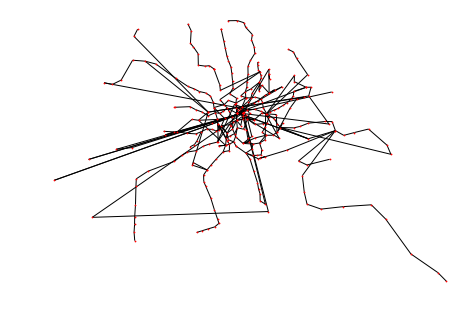

In [9]:
import requests
import json
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from pylab import *
import pprint

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

##上海地铁站信息
SH_sub_datas = """上海地铁1号线:富锦路 友谊西路 宝安公路 共富新村 呼兰路 通河新村 共康路 彭浦新村 汶水路 上海马戏城 延长路 中山北路 上海火车站 汉中路 新闸路 人民广场 黄陂南路 陕西南路 常熟路 衡山路 徐家汇 上海体育馆 漕宝路 上海南站 锦江乐园 莲花路 外环路 莘庄
上海地铁2号线:浦东国际机场 海天三路 远东大道 凌空路 川沙 华夏东路 创新中路 唐镇 广兰路 金科路 张江高科 龙阳路 世纪公园 上海科技馆 世纪大道 东昌路 陆家嘴 南京东路 人民广场 南京西路 静安寺 江苏路 中山公园 娄山关路 威宁路 北新泾 淞虹路 虹桥2号航站楼 虹桥火车站 徐泾东
上海地铁3号线:上海南站 石龙路 龙漕路 漕溪路 宜山路 虹桥路 延安西路 中山公园 金沙江路 曹杨路 镇坪路 中潭路 上海火车站 宝山路 东宝兴路 虹口足球场 赤峰路 大柏树 江湾镇 殷高西路 长江南路 淞发路 张华浜 淞滨路 水产路 宝杨路 友谊路 铁力路 江杨北路
上海地铁4号线:宜山路 上海体育馆 上海体育场 东安路 大木桥路 鲁班路 西藏南路 南浦大桥 塘桥 蓝村路 浦电路 世纪大道 浦东大道 杨树浦路 大连路 临平路 海伦路 宝山路 上海火车站 中潭路 镇坪路 曹杨路 金沙江路 中山公园 延安西路 虹桥路
上海地铁5号线(主线):莘庄 春申路 银都路 颛桥 北桥 剑川路 东川路 金平路 华宁路 文井路 闵行开发区
上海地铁6号线:港城路 外高桥保税区北 航津路 外高桥保税区南 洲海路 五洲大道 东靖路 巨峰路 五莲路 博兴路 金桥路 云山路 德平路 北洋泾路 民生路 源深体育中心 世纪大道 浦电路 蓝村路 上海儿童医学中心 临沂新村 高科西路 东明路 高青路 华夏西路 上南路 灵岩南路 东方体育中心
上海地铁7号线:花木路 龙阳路 芳华路 锦绣路 杨高南路 高科西路 云台路 耀华路 长清路 后滩 龙华中路 东安路 肇嘉浜路 常熟路 静安寺 昌平路 长寿路 镇坪路 岚皋路 新村路 大华三路 行知路 大场镇 场中路 上大路 南陈路 上海大学 祁华路 顾村公园 刘行 潘广路 罗南新村 美兰湖
上海地铁8号线:沈杜公路 联航路 江月路 浦江镇 芦恒路 凌兆新村 东方体育中心 杨思 成山路 耀华路 中华艺术宫 西藏南路 陆家浜路 老西门 大世界 人民广场 曲阜路 中兴路 西藏北路 虹口足球场 曲阳路 四平路 鞍山新村 江浦路 黄兴路 延吉中路 黄兴公园 翔殷路 嫩江路 市光路
上海地铁9号线:曹路 民雷路 顾唐路 金海路 金吉路 金桥 台儿庄路 蓝天路 芳甸路 杨高中路 世纪大道 商城路 小南门 陆家浜路 马当路 打浦桥 嘉善路 肇嘉浜路 徐家汇 宜山路 桂林路 漕河泾开发区 合川路 星中路 七宝 中春路 九亭 泗泾 佘山 洞泾 松江大学城 松江新城 松江体育中心 醉白池 松江南站
上海地铁10号线主线:新江湾城 殷高东路 三门路 江湾体育场 五角场 国权路 同济大学 四平路 邮电新村 海伦路 四川北路 天潼路 南京东路 豫园 老西门 新天地 陕西南路 上海图书馆 交通大学 虹桥路 宋园路 伊犁路 水城路 龙溪路 龙柏新村 紫藤路 航中路
上海地铁10号线支线:龙溪路 上海动物园 虹桥1号航站楼 虹桥2号航站楼 虹桥火车站
上海地铁11号线支线:嘉定新城 上海赛车场 昌吉东路 上海汽车城 安亭 兆丰路 光明路 花桥
上海地铁11号线主线:迪士尼 康新公路 秀沿路 罗山路 御桥 浦三路 三林东 三林 东方体育中心 龙耀路 云锦路 龙华 上海游泳馆 徐家汇 交通大学 江苏路 隆德路 曹杨路 枫桥路 真如 上海西站 李子园 祁连山路 武威路 桃浦新村 南翔 马陆 嘉定新城 白银路 嘉定西 嘉定北
上海地铁12号线:七莘路 虹莘路 顾戴路 东兰路 虹梅路 虹漕路 桂林公园 漕宝路 龙漕路 龙华 龙华中路 大木桥路 嘉善路 陕西南路 南京西路 汉中路 曲阜路 天潼路 国际客运中心 提篮桥 大连路 江浦公园 宁国路 隆昌路 爱国路 复兴岛 东陆路 巨峰路 杨高北路 金京路 申江路 金海路
上海地铁13号线:金运路 金沙江西路 丰庄 祁连山南路 真北路 大渡河路 金沙江路 隆德路 武宁路 长寿路 江宁路 汉中路 自然博物馆 南京西路 淮海中路 新天地 马当路 世博会博物馆 世博大道 长清路 成山路 东明路 华鹏路 下南路 北蔡 陈春路 莲溪路 华夏中路 中科路 学林路 张江路
上海地铁16号线:龙阳路 华夏中路 罗山路 周浦东 鹤沙航城 航头东 新场 野生动物园 惠南 惠南东 书院 临港大道 滴水湖
上海地铁17号线:东方绿舟 朱家角 淀山湖大道 漕盈路 青浦新城 汇金路 赵巷 嘉松中路 徐泾北城 徐盈路 蟠龙路 诸光路 虹桥火车站
上海地铁磁悬浮:龙阳路 浦东国际机场
上海地铁浦江线:沈杜公路 三鲁公路 闵瑞路 浦航路 东城一路 汇臻路"""

#Get地铁线路和站点
def get_sub_station(SH_subway_data):
    SH_sub = {}
    for line in SH_subway_data.split('\n'):
        if not line: continue
        if line.startswith("//"): continue
        sub_line, stations = line.split(':')
        SH_sub[sub_line.strip()] = stations.split()
    return SH_sub

##SH_subway_inform存放地铁线路和站名信息
SH_subway_infor = get_sub_station(SH_sub_datas)
#pprint.pprint(SH_subway_inform)

##Get所有地铁站名
def get_all_stations(sub_inform):
    sub_stations=set()
    for key in sub_inform.keys():
        sub_stations.update(set(sub_inform[key]))
    return sub_stations

##Get每一个地铁站的相互连接站
def get_subway_connection(line_station):
    sub_stations=get_all_stations(line_station)
    sub_nets = {}
    for station in sub_stations:
        next_stations = []
        for key in line_station.keys():
            if station in line_station[key]:
                line_all_station = line_station[key]
                station_num = line_all_station.index(station)
                if station_num == 0:
                    next_stations.append(line_all_station[1])
                elif station_num == len(line_all_station)-1:
                    next_stations.append(line_all_station[station_num-1])
                else:
                    next_stations.extend([line_all_station[station_num-1], line_all_station[station_num+1]])
        sub_nets[station] = set(next_stations)
    return sub_nets


subway_stations_connection = get_subway_connection(SH_subway_infor) ##subway_station_connections存放每一个地铁站的连接信息

#print(subway_stations_connection)    #pprint打印各站的连接站

###通过高德API获得station站点的地理位置坐标
def get_coordina(station):
    station_location=[0, 0]
    url = 'https://restapi.amap.com/v3/geocode/geo'
    params = {'key': 'eec583f63f8a413f0f63518d21e3eff0', 'address': station}
    responses = requests.get(url, params)
    responses_file =  json.loads(responses.text)
    #print(responses_file)
    coordina_inform = responses_file['geocodes'][0]['location']
    long, lat = coordina_inform.split(',')
    station_location[0]=float(long)
    station_location[1]=float(lat)
    return station_location

###获得所有地铁站的地理位置坐标
def get_all_station_coordina(stations):
    station_coor_inform = {}
    for station in stations:
        station_name = '上海'+ station + '地铁站'
        station_coor_inform[station] = get_coordina(station_name)
    return station_coor_inform

###SH_all_sub_stations存放所有地铁站名
###station_long_lat_inform存放所有地铁站的坐标信息
SH_sub_stations = get_all_stations(SH_subway_infor)
station_long_lat_informs = get_all_station_coordina(SH_sub_stations)
print(station_long_lat_informs)

##绘制地铁网络线路图
stations_connection_graph = nx.Graph(subway_stations_connection)
stations_connection_graph.add_nodes_from(list(station_long_lat_informs.keys()))
nx.draw(stations_connection_graph, station_long_lat_informs, with_labels=False, node_size=0.6)


##每一站之间的实际地理距离
def station_geo_distance(station1, station2):
    lat1, lon1 = station_long_lat_inform[station1][0], station_long_lat_inform[station1][1]
    lat2, lon2 = station_long_lat_inform[station2][0], station_long_lat_inform[station2][1]
    radius = 6371  ##地球平均半径
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

#station_geo_distance('迪士尼', '康新公路')

###获得某个path的长度
def get_path_distance(path):
    path_distance = 0
    for i in range(len(path)-1):
        between_stations_distance = station_geo_distance(path[i], path[i+1])
        path_distance += between_stations_distance
    return path_distance

####将pathes里面的path按照长度进行排序
def path_distance_sort(pathes):
    return sorted(pathes, key=get_path_distance)

###广度优先搜索算法1-Normal
def BF_Search1(Connection_net, start, destination):
    Pathes = [[start]]
    visited_station = set()
    while Pathes:
        Path = Pathes.pop(0)
        frontier = Path[-1]
        if frontier in visited_station: continue
        successors = Connection_net[frontier]
        for station in successors:
            if station in Path: continue
            Path = Path + [station]
            Pathes.append(Path)
            
            if station == destination:
                return Path
        visited_station.add(frontier)
        
####将path的站点和对应线路打印出来
def BF_Search_print(path):
    BF_path = {}
    for station in path:
        for key in SH_subway_infor.keys():
            if station in SH_subway_infor[key]:
                BF_path[station] = key
    return BF_path

##某条path换乘线路数
def get_transfer_times(path):
    path_line_list = []
    path_inform = BF_Search_print(path)
    for key in path_inform.keys():
        path_line_list.append(path_inform[key])
    return (len(set(path_line_list)))

##Pathes换乘最少
def path_transfer_sort(pathes):
    return sorted(pathes, key=get_transfer_times)

##站数最少
def path_station_num_sort(pathes):
    return (sorted(pathes, key=len))


###广度优先搜索算法2-距离最短/站数最少/换乘最少       
def BF_Search2(Connection_net, start, destination, search_strategy):
    Pathes = [[start]]
    while Pathes:
        Path = Pathes.pop(0)
        frontier = Path[-1]
        successors = Connection_net[frontier]
        for station in successors:
            if station in Path: continue
            Path = Path+[station]
            Pathes.append(Path)
            Pathes = search_strategy(Pathes)
            
            if Pathes and Pathes[0][-1] == destination:
                return Pathes[0]

station_to_station_path_1 = BF_Search1(subway_stations_connection, '虹桥火车站', '迪士尼')       
#station_to_station_path_2 = BF_Search2(subway_stations_connection, '虹桥火车站', '迪士尼', path_distance_sort)
#station_to_station_path_3 = BF_Search2(subway_stations_connection, '虹桥火车站', '迪士尼', path_transfer_sort)
#station_to_station_path_4 = BF_Search2(subway_stations_connection, '虹桥火车站', '迪士尼', path_station_num_sort)


print (BF_Search_print(station_to_station_path_1))
#print (BF_Search_print(station_to_station_path_2))
#print (BF_Search_print(station_to_station_path_3))
#print (BF_Search_print(station_to_station_path_4))
